In [9]:
#!/opt/anaconda/bin/python
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fileRoot = "/home/drukhary/IFMO/OS/Lab1/data/processed/"

drukharyData = [
    {
        "datafile":"cpu.log",
        "xLabelName":"Time (seconds)",
        "yLabelName":"%CPU",
        "yColumn":"%CPU",
        "data":pd.read_csv(f'{fileRoot}/cpu.log', delim_whitespace=True)
        },
    {
        "datafile":"io.log",
        "xLabelName":"Time (seconds)",
        "yLabelName":"kB_wr/s",
        "yColumn":"kB_wr/s",
        "data":pd.read_csv(f'{fileRoot}/io.log', delim_whitespace=True)
        },
    {
        "datafile":"network.log",
        "xLabelName":"Time (seconds)",
        "yLabelName":"rx",
        "yColumn":"rx",
        "data":pd.read_csv(f'{fileRoot}/network.log', delim_whitespace=True)
        },
    {
        "datafile":"network.log",
        "xLabelName":"Time (seconds)",
        "yLabelName":"tx",
        "yColumn":"tx",
        "data":pd.read_csv(f'{fileRoot}/network.log', delim_whitespace=True)
        },
]




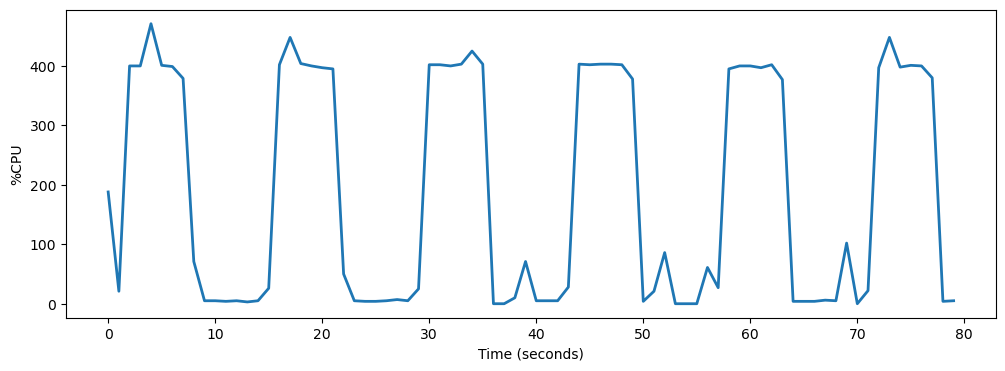

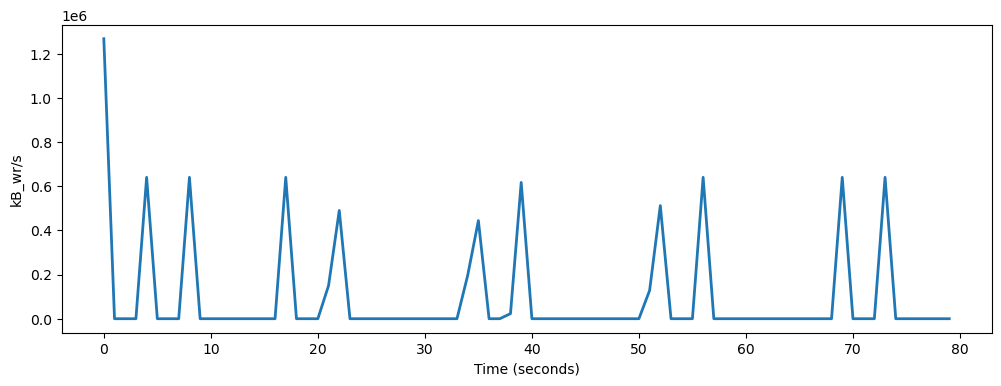

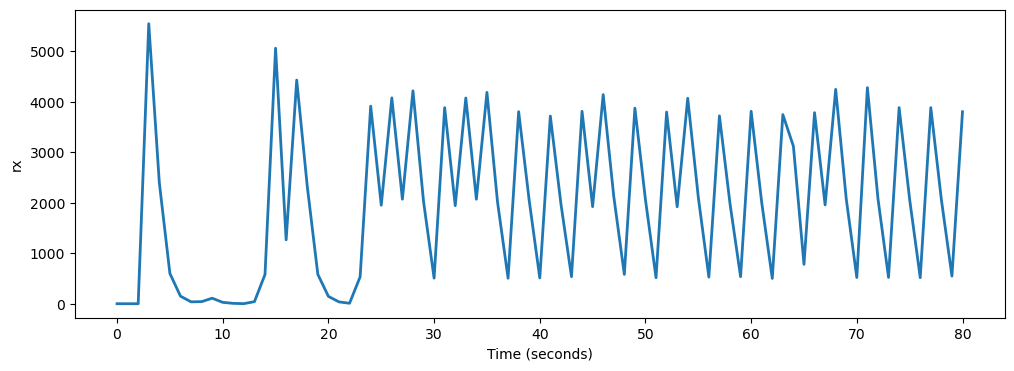

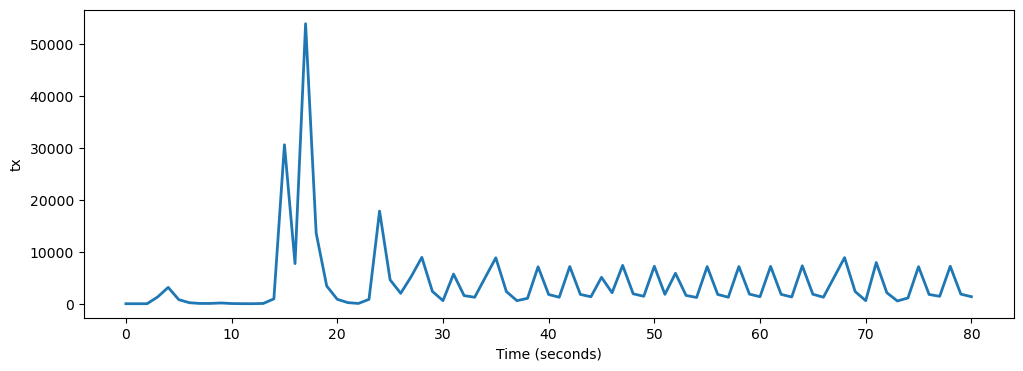

In [10]:
def scaleReduce(x:list,y:list,n:int):
    newX = []
    newY = []
    for i in range(len(x)//n):
        sum = 0

        for j in range(n):
            sum += y[i*n+j]
        newY.append(sum)
        newX.append(i*n)

    return np.array(newX),np.array(newY)
plt.rcParams["figure.figsize"] = (12,4)

for info in drukharyData:
    csvData = pd.read_csv(f'{fileRoot}/{info["datafile"]}', delim_whitespace=True)

    y = list(csvData[info["yColumn"]])

    n = 1
        
    scaledX,scaledY = scaleReduce(np.linspace(0, len(y)),np.array(y),n)

    fig, ax = plt.subplots()

    ax.plot(scaledX,scaledY, linewidth=2.0)
    
    plt.xlabel(info["xLabelName"])
    plt.ylabel(info["yLabelName"])
    plt.autoscale()
    plt.show()

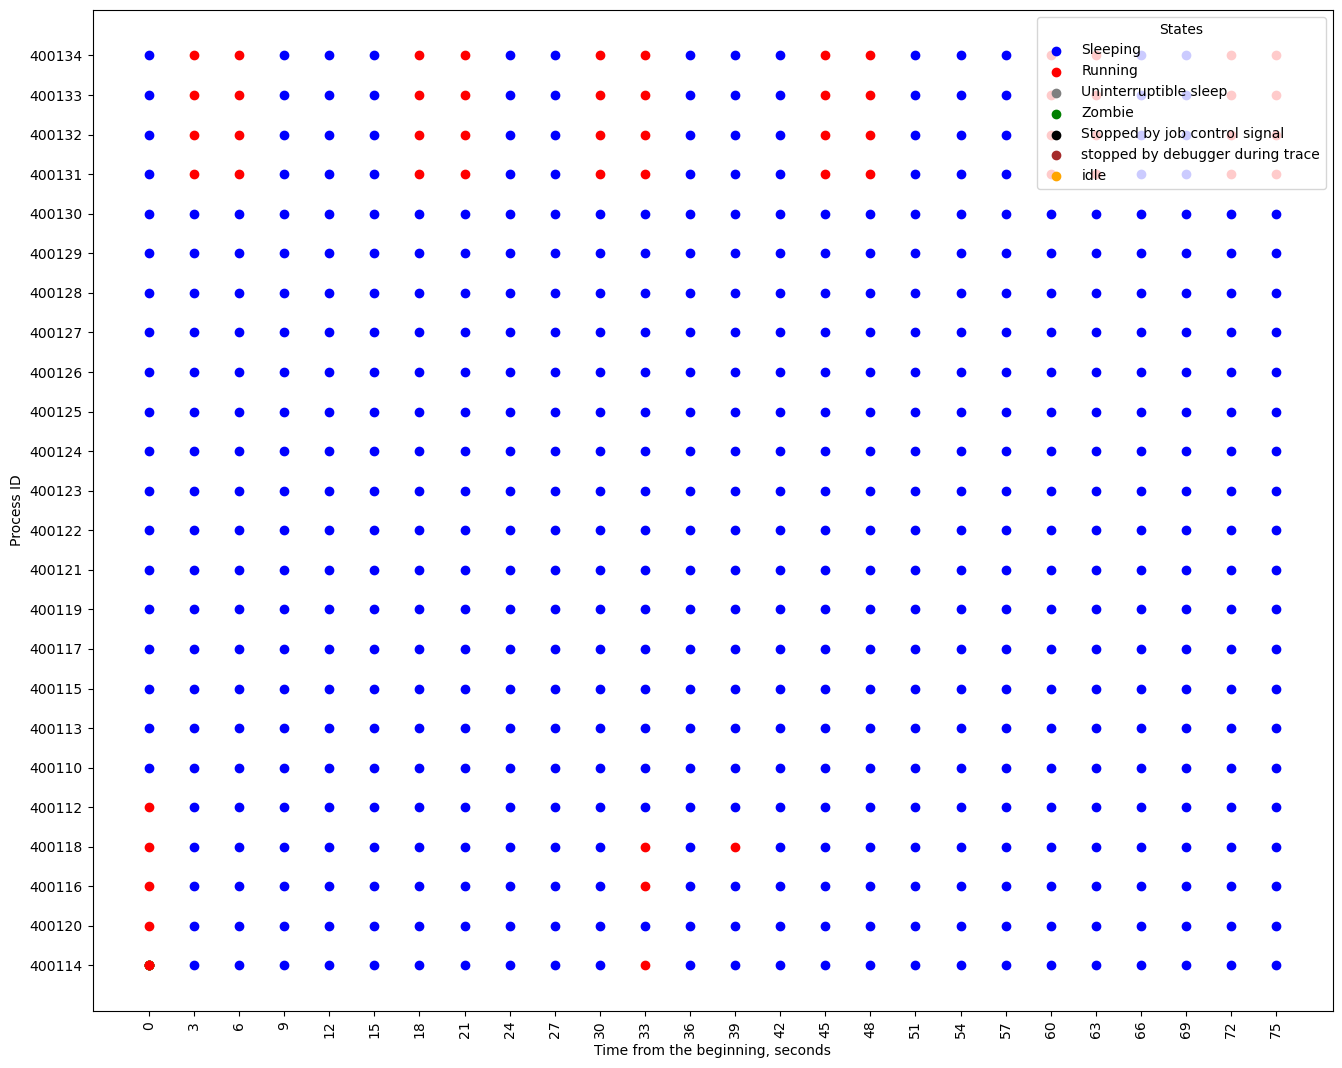

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colors = {'S': u'blue', 'R': u'red', 'D': u'grey', 'Z': u'green',
          'T': u'yellow', 'T': u"black", 't': u'brown', 'I': u'orange'}
stateDescribe = {
    'S': 'Sleeping',
    'R': 'Running',
    'D': 'Uninterruptible sleep',
    'Z': 'Zombie',
    'T': "Stopped by job control signal",
    't': "stopped by debugger during trace",
    'I': 'idle'
}

data = pd.read_csv('/home/drukhary/IFMO/OS/Lab1/data/processed/threads.log',
                   delim_whitespace=True, usecols=['PID', 'S'])


fig, ax = plt.subplots(1, 1, figsize=(16, 13))

markers = [ax.scatter(0, 0, color=color) for color in colors.values()]
y_ticks = data['PID'].unique()

for i, pid in enumerate(y_ticks):
    length = len(data[data['PID'] == pid])
    for j, row in enumerate(range(length)):
        c = colors[data[data['PID'] == pid].iloc[row]['S']]
        ax.scatter(j, i, c=c)

ax.set_xticks(range(length))
ax.set_xticklabels(range(0, 3*length, 3), rotation='vertical')

ax.set_yticks(range(len(y_ticks)))
ax.set_yticklabels(y_ticks)

ax.set_xlabel('Time from the beginning, seconds')
ax.set_ylabel('Process ID')

ax.legend(markers, stateDescribe.values(), title="States")

plt.show()
